# PART 2

In [1]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from scipy.stats import normaltest
import pmdarima as pm

In [2]:
path = 'C:\\Users\\ASUS\\Desktop\\423ProjectPart2\\data'
# path = 'C:\\Users\\EylülRanaSaraç\\OneDrive - boun.edu.tr\\Masaüstü\\IE 423\\Project Part 2\\golden-girlz\\ProjectPart2\\20180101_20231121_bist30'

all_files = glob.glob(path + "/*_bist30.csv")

specified_files = [
    "20180101_20180401_bist30.csv", "20180402_20180701_bist30.csv",
    "20180702_20180930_bist30.csv", "20181001_20181230_bist30.csv",
    "20181231_20190331_bist30.csv", "20190401_20190630_bist30.csv",
    "20190701_20190929_bist30.csv", "20190930_20191229_bist30.csv",
    "20191230_20200329_bist30.csv", "20200330_20200628_bist30.csv",
    "20200629_20200927_bist30.csv", "20200928_20201227_bist30.csv"
]

# Filter files based on specified file dates
files_2018_to_2021 = [file for file in all_files if any(spec_file in file for spec_file in specified_files)]

# Loop through file paths to combine the data
combined_data_AKBNK = pd.DataFrame()
combined_data_GARAN = pd.DataFrame()

for file_path in files_2018_to_2021:
    # Read the file and set the 'timestamp' column as the index by converting it to a datetime object
    # After reading the data, set the frequency to hourly
    data = pd.read_csv(file_path, parse_dates=['timestamp'], index_col='timestamp')


    akbnk_data = data[data['short_name'] == 'AKBNK']
    garan_data = data[data['short_name'] == 'GARAN']

    # Concatenate the data
    combined_data_AKBNK = pd.concat([combined_data_AKBNK, akbnk_data])
    combined_data_GARAN = pd.concat([combined_data_GARAN, garan_data])

#### Stationarity test for AKBNK

In [4]:
result_original_AKBNK = adfuller(combined_data_AKBNK['price'])
test_statistic_original_AKBNK = result_original_AKBNK[0]
p_value_original_AKBNK = result_original_AKBNK[1]

print(f'Test Statistic (AKBNK Original): {test_statistic_original_AKBNK}')
print(f'p-value (AKBNK Original): {p_value_original_AKBNK}')

if p_value_original_AKBNK <= 0.05:
    print('The AKBNK original time series is likely stationary.')
else:
    print('The AKBNK original time series is likely non-stationary.')

KeyError: 'price'


#### Stationarity tests for GARAN

In [ ]:
result_original_GARAN = adfuller(combined_data_GARAN['price'])
test_statistic_original_GARAN = result_original_GARAN[0]
p_value_original_GARAN = result_original_GARAN[1]
print(f'Test Statistic (GARAN Original): {test_statistic_original_GARAN}')
print(f'p-value (GARAN Original): {p_value_original_GARAN}')

if p_value_original_GARAN <= 0.05:
    print('The GARAN original time series is likely stationary.')
else:
    print('The GARAN original time series is likely non-stationary.')

Test Statistic (GARAN Original): -2.1986482928084854
p-value (GARAN Original): 0.2067364143396111
The GARAN original time series is likely non-stationary.


#### Plotting the differenced data for AKBNK


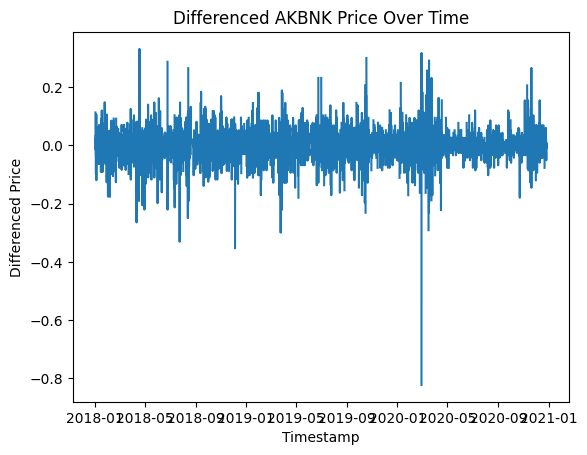

In [ ]:
differenced_data_AKBNK = differenced_data_GARAN.interpolate().dropna()
differenced_data_AKBNK = differenced_data_AKBNK.asfreq('H')  # Set the frequency to hourly
plt.plot(differenced_data_AKBNK.index, differenced_data_AKBNK)
plt.xlabel('Timestamp')
plt.ylabel('Differenced Price')
plt.title('Differenced AKBNK Price Over Time')
plt.show()


it looks stationary.

#### Plotting the differenced data for GARAN

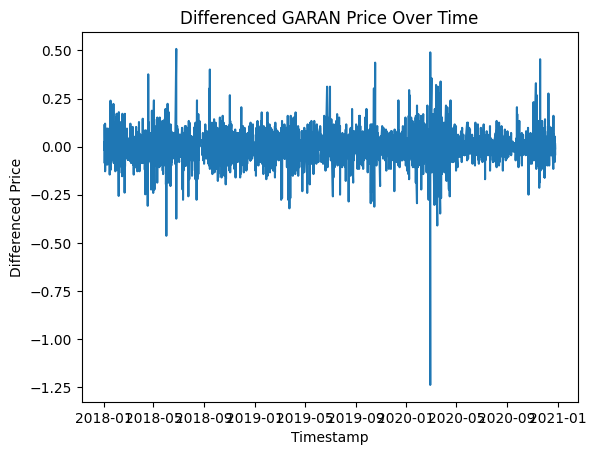

In [ ]:
differenced_data_GARAN = differenced_data_GARAN.interpolate().dropna()
differenced_data_GARAN = differenced_data_GARAN.asfreq('H')  # Set the frequency to hourly
plt.plot(differenced_data_GARAN.index, differenced_data_GARAN)
plt.xlabel('Timestamp')
plt.ylabel('Differenced Price')
plt.title('Differenced GARAN Price Over Time')
plt.show()

it looks stationary.

#### Fit an ARIMA model for AKBNK

In [ ]:
order_AKBNK = (1, 1, 1)
model_AKBNK = SARIMAX(differenced_data_AKBNK, order=order_AKBNK)
model_AKBNK_fit = model_AKBNK.fit()

# Print the fitted model summary for GARAN
print(model_AKBNK_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                26121
Model:               SARIMAX(1, 1, 1)   Log Likelihood               13043.475
Date:                Sat, 09 Dec 2023   AIC                         -26080.950
Time:                        01:28:45   BIC                         -26056.439
Sample:                    01-02-2018   HQIC                        -26073.033
                         - 12-25-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0229      0.006     -4.049      0.000      -0.034      -0.012
ma.L1         -1.0000      0.002   -521.003      0.000      -1.004      -0.996
sigma2         0.0018   7.91e-06    221.824      0.0

#### Fit an ARIMA model for GARAN

In [ ]:
order_GARAN = (0, 1, 1)
model_GARAN = SARIMAX(differenced_data_GARAN, order=order_GARAN)
model_GARAN_fit = model_GARAN.fit()

# Print the fitted model summary for GARAN
print(model_GARAN_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                26121
Model:               SARIMAX(0, 1, 1)   Log Likelihood               49524.896
Date:                Sat, 09 Dec 2023   AIC                         -99045.792
Time:                        01:29:49   BIC                         -99029.451
Sample:                    01-02-2018   HQIC                        -99040.514
                         - 12-25-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5546      0.001   -461.777      0.000      -0.557      -0.552
sigma2         0.0013    1.3e-06   1011.962      0.000       0.001       0.001
Ljung-Box (L1) (Q):                   1.76   Jarque-

#### Make predictions for AKBNK

#### Make predictions for GARAN

#### Set up Control Limits for AKBNK According to the Forecast

#### Set up Control Limits for GARAN According to the Forecast